<a href="https://colab.research.google.com/github/JisaVarghese/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from pylab import *
from itertools import cycle
from sklearn.preprocessing import StandardScaler 
import pandas as pd

In [5]:
df = pd.read_csv("CovidDensity.csv")
print (df.head())


   OBJECTID  ORIGID  ...  SHAPE_Length   SHAPE_Area
0      6397       1  ...  3.193486e+05   2432351721
1      6398       2  ...  5.159545e+05   5575009911
2      6399       3  ...  1.013949e+06   8722541706
3      6400       4  ...  2.129949e+06  19529490886
4      6401       5  ...  2.145086e+06  14624041937

[5 rows x 17 columns]


Map target categories as integers 

In [6]:
d = {'Low': 1, 'Medium': 2, 'High': 3} 

df['Covid Density'] = df['Covid Density'].map(d)
Target_Names = {'Low','Medium','High'}


Input X as samples, Features and Y as Target

In [7]:
X = df[['Lat', 'Long']].values
Y = df[['Covid Density']].values
Y = Y.reshape(572)


Plot values

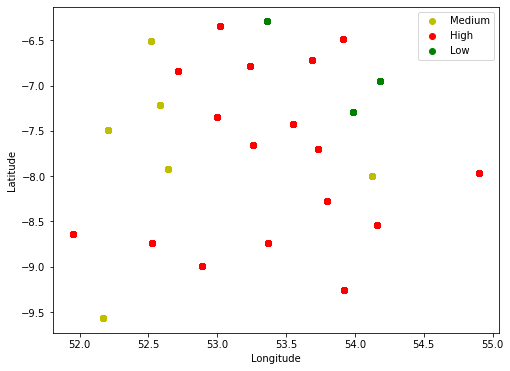

In [9]:
plt.figure(figsize=(8, 6))
plt.ylabel('Latitude');
plt.xlabel('Longitude');

colors = cycle('yrgb')
target_ids = range(1,len(d)+1)

### Assigning the colors and plotting the graph
for i, c, label in zip(target_ids, colors, Target_Names):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], c=c, label=label)
    
plt.legend()
plt.show()

Applying SVC

In [10]:
C = .95
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

svc = svm.SVC(kernel='poly',degree=3, C=C).fit(X, Y)

Prediction

No handles with labels found to put in legend.


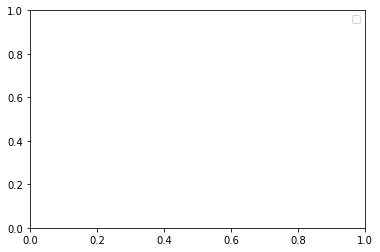

ValueError: ignored

In [11]:
def plotPredictions(clf):
 
 #Error 
  xx, yy = np.meshgrid(np.arange(-1, -9, 1), np.arange(52, 53, .10))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  plt.figure(figsize=(8, 6))
  Z = Z.reshape(xx.shape)
  plt.ylabel('Latitude');
  plt.xlabel('Longitude');
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  #plt.scatter(features[:,0], features[:,1], c=target.astype(np.float))
  for i, c, label in zip(target_ids, colors, Target_Names):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], c=c, label=label)

plt.legend()
plt.show()
    
plotPredictions(svc)

